In [27]:
import pandas as pd

In [28]:
data=pd.read_csv(r"Z:\Second Semister\Machine Learning\Assignment\Assinment NO.4\Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [29]:
data1=data.drop(columns=['User ID'])
data1

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [30]:
data1.head

<bound method NDFrame.head of      Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]>

In [31]:
data1.replace({'Male':0,'Female':1},inplace=True)

In [32]:
data1.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [33]:
a=data1.corr()
a

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


In [34]:
import seaborn as sns

<AxesSubplot:>

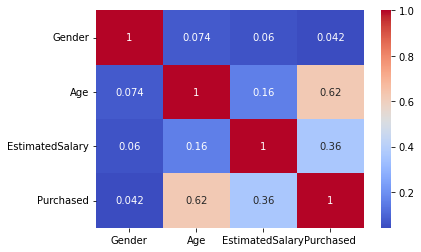

In [35]:
sns.heatmap(a,cmap='coolwarm',annot=True)

In [36]:
data1.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Independant Variable='Age','EstimatedSalary'

In [37]:
x=data1[['Age','EstimatedSalary','Gender']]
x

,Age,EstimatedSalary,Gender
0,19,19000,0
1,35,20000,0
2,26,43000,1
3,27,57000,1
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,0
397,50,20000,1
398,36,33000,0


# Target Variable='Purchased'

In [38]:
y=data1['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
model=GaussianNB()

In [92]:
model.fit(x_train,y_train)

GaussianNB()

In [93]:
predictions=model.predict(x_test)
predictions  # predict x value varun  y values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [94]:
y_test  # acutal y values

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(predictions,y_test)

array([[56,  4],
       [ 2, 18]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchased', ylabel='Density'>

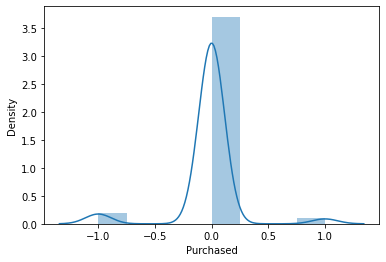

In [97]:
sns.distplot(predictions-y_test)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_test,predictions)

0.925

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80

